In [1]:
#利用SVM进行多变量时序预测欺骗干扰

#导入库
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
# 导入数据集
dataset = pd.read_csv('./data/SMOTE数据拆分/0在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/1在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/2在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/3在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/4在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/5在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/6在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/7在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/8在第一位.csv')
#dataset = pd.read_csv('./data/SMOTE数据拆分/9在第一位.csv')

In [3]:
#查看数据集的前5个值
dataset.head()

,count,gpsPdop,gpsNumSv,gpsWeek,itow,gpsSec,P_Sol_Status,Pos_Type,AvionicsTemp,MainPowerV,...,rcState,Failure_ad,leftRPM,AirHeight,Failure,WWest,WSouth,Event,Capacity,Jammer
0,157.0,2.5,11.0,2176.0,438825400.0,6287.8,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,9.1,3145920.0,-3.46,2.11,0.0,0.0,1
1,161.0,1.0,31.0,2190.0,289780800.0,1422.4,0.0,50.0,29.0,24.7,...,1.0,64.0,0.0,181.0,3145920.0,1.50,-1.53,0.0,0.0,0
2,37.0,1.0,31.0,2190.0,289912800.0,1554.4,0.0,50.0,30.0,24.7,...,1.0,64.0,0.0,181.2,3145920.0,2.33,-1.54,0.0,0.0,0
3,170.0,2.5,11.0,2176.0,438838400.0,6300.8,0.0,16.0,41.0,24.7,...,1.0,64.0,0.0,8.5,3145920.0,-3.50,2.47,0.0,0.0,1
4,124.0,1.0,31.0,2190.0,289743600.0,1385.2,0.0,50.0,29.0,24.9,...,1.0,64.0,0.0,178.3,3145920.0,2.43,-1.39,0.0,0.0,0


In [4]:
## 数据清洗
#A = dataset.loc[:, (dataset != 0).any(axis=0)]#删除数据全部为0的列
#del A['gpsWeek']
#del A['ServPowerV']
##del A['APGlobalStatus']
#del A['GPSStatus']
#del A['mpStatus']
##del A['Action']
#del A['rcState']
#del A['Failure_ad']
#del A['Failure']
#dataset = A
#print(dataset)

In [5]:
#将数据集拆分为独立变量和因变量
X = dataset[dataset.columns[:-1]]   #从0到倒数第一列
y = dataset.Jammer                  #只包括data的y这一列

In [6]:
#将数据集分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 34)

In [7]:
#from sklearn.svm import SVC
#classifier = SVC(kernel='linear')

#history = classifier.fit(X_train,y_train)

#score = classifier.score(X_test,y_test)


##功能缩放，使变量在单个缩放
##from sklearn.preprocessing import StandardScaler
##sc = StandardScaler()
##X_train = sc.fit_transform(X_train)
##X_test = sc.transform(X_test)

In [8]:
X_train,X_test 

(            count  gpsPdop   gpsNumSv  gpsWeek          itow       gpsSec  \
 12164  175.454866      2.5  11.000000   2176.0  4.388439e+08  6306.254866   
 222    238.000000      2.5  17.000000   2176.0  4.395900e+08   498.800000   
 10649   19.000000      1.0  30.000000   2190.0  2.904068e+08  2048.400000   
 4170    25.220816      2.5   7.220816   2176.0  4.386560e+08  6118.420816   
 10762  130.248516      5.0  16.000000   2176.0  4.394060e+08   314.848516   
 ...           ...      ...        ...      ...           ...          ...   
 12022  146.000000      1.0  31.000000   2190.0  2.897656e+08  1407.200000   
 5993    26.000000      1.0  31.000000   2190.0  2.891336e+08   775.200000   
 10730  210.000000      1.0  30.000000   2190.0  2.900858e+08  1727.400000   
 5242    22.000000      3.0   7.000000   2176.0  4.389978e+08  6460.200000   
 11681  147.621046      2.5  11.000000   2176.0  4.388158e+08  6278.221046   
 
        P_Sol_Status  Pos_Type  AvionicsTemp  MainPowerV  ... 

In [9]:
#PCA分析
from sklearn.decomposition import PCA
pca = PCA(n_components=64)


#数据的标准化
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X_train)
print(X_norm)

X_train_pca = pca.fit_transform(X_norm)
#计算分析后各成分的方差以及方差比例
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)
print(sum(var_ratio))

[[ 0.81415647 -0.09689669 -0.76446413 ...  0.68142973  0.
   0.        ]
 [ 1.6745845  -0.09689669 -0.17302073 ...  0.22885598  0.
   0.        ]
 [-1.33817966 -0.17330128  1.10843997 ... -0.53998726  0.
   0.        ]
 ...
 [ 1.28939091 -0.17330128  1.10843997 ... -0.98526328  0.
   0.        ]
 [-1.29690892 -0.07142849 -1.15875973 ...  0.0151235   0.
   0.        ]
 [ 0.43124901 -0.09689669 -0.76446413 ...  0.2932567   0.
   0.        ]]
[2.33678490e+01 3.18725787e+00 3.03194230e+00 2.51087245e+00
 2.08711708e+00 1.91180891e+00 1.72409460e+00 1.55472582e+00
 1.47879104e+00 1.30063764e+00 1.18260495e+00 1.08997130e+00
 1.06476709e+00 1.01020145e+00 9.90861306e-01 8.75162663e-01
 8.54478701e-01 7.89884302e-01 7.35038442e-01 6.91760564e-01
 6.25664898e-01 5.89849803e-01 5.15159979e-01 4.70747447e-01
 4.68835051e-01 4.06773562e-01 3.76937198e-01 3.53897849e-01
 3.37002812e-01 3.28773425e-01 2.99186854e-01 2.82829954e-01
 2.71790674e-01 2.35498667e-01 2.29580275e-01 1.62486428e-01
 1.4465

In [10]:
##可视化方差比例
#fig2 = plt.figure(figsize=(10,5))
#plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13,14],var_ratio)
##plt.bar([1,2,3,4,5,],var_ratio)
#plt.xlabel('Components')
#plt.ylabel('Variance ratio')
#plt.show()

(9679, 25) (9679, 64)
[0.40285232 0.05494704 0.05226947 0.04328643 0.03598106 0.03295882
 0.0297227  0.02680285 0.02549376 0.02242247 0.02038763 0.01879067
 0.01835616 0.01741546 0.01708204 0.01508744 0.01473086 0.01361729
 0.01267171 0.01192563 0.01078614 0.01016851 0.00887857 0.00811441
 0.00808147]
<class 'numpy.ndarray'>
0.933


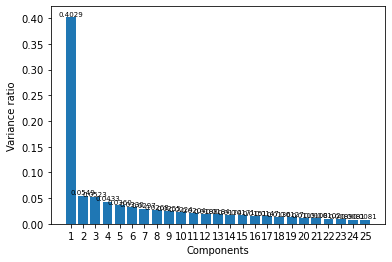

In [11]:
# 训练集数据降维到25维
pca = PCA(n_components=25)
X_train_pca = pca.fit_transform(X_norm)
#var_ratio2 = pca.fit_transform(X_norm)
print(X_train_pca.shape,X_norm.shape)

# 计算方差比例
var_ratio2 = pca.explained_variance_ratio_
print(var_ratio2)
print(type(var_ratio2))

var = list(range(1, 26))

#var_ratio2='{:.4f}'.format(var_ratio2[0])

#var_ratio2=int(var_ratio2)

var_ratio2 = np.around(var_ratio2,decimals=4)# 保留4位小数
A=np.sum(var_ratio2)
print(A)

# 绘制图像

#plt.bar(var,var_ratio2)
plt.bar(var,var_ratio2,tick_label=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15",
                                   "16","17","18","19","20","21","22","23","24","25"])

plt.xlabel('Components')
plt.ylabel('Variance ratio')


#for i in range(len(var)):
#    plt.text(x = i-0.1, y = var_ratio2[i]+1,s = var_ratio2[i] ) # s表示注释内容

for var,var_ratio2 in zip(var,var_ratio2):   #柱子上的数字显示
 plt.text(var,var_ratio2,'%.4f'%var_ratio2,ha='center',va='bottom',fontsize=7);


plt.show()

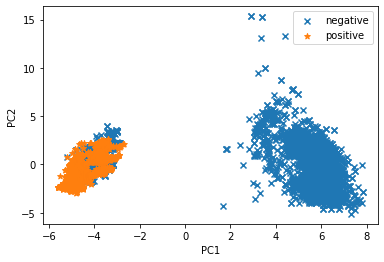

In [12]:
#降维数据的可视化
fig3 = plt.figure()
plt.scatter(X_train_pca[:,0][y_train==0],X_train_pca[:,1][y_train==0],marker='x',label='negative')
plt.scatter(X_train_pca[:,0][y_train==1],X_train_pca[:,1][y_train==1],marker='*',label='positive')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [13]:
# 降维后的模型建立与训练

from sklearn import svm

PCA_SVM = svm.SVC(C=1000,kernel='rbf', gamma=0.01,decision_function_shape='ovo')

PCA_SVM.fit(X_train_pca,y_train)

SVC(C=1000, decision_function_shape='ovo', gamma=0.01)

In [14]:
###放到最后，因为SVM 网格搜索太慢了###
# 基于svm 实现分类  # 基于网格搜索获取最优模型
from sklearn.model_selection import GridSearchCV
model = svm.SVC(probability=True)
params = [
{'kernel':['linear'],'C':[1,10,100,1000]},
{'kernel':['poly'],'C':[1,10],'degree':[2,3]},
{'kernel':['rbf'],'C':[1,10,100,1000], 
 'gamma':[1,0.1, 0.01, 0.001]}]
model = GridSearchCV(estimator=model, param_grid=params, cv=10)	 
model.fit(X_train_pca,y_train)

## 网格搜索训练后的副产品
print("模型的最优参数：",model.best_params_)
print("最优模型分数：",model.best_score_)
print("最优模型对象：",model.best_estimator_)

模型的最优参数： {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
最优模型分数： 0.9965906954284787
最优模型对象： SVC(C=100, gamma=0.1, probability=True)


In [15]:
PCA_SVM = svm.SVC(C=100,kernel='rbf', gamma=0.1,decision_function_shape='ovo')
PCA_SVM.fit(X_train_pca,y_train)

SVC(C=100, decision_function_shape='ovo', gamma=0.1)

In [16]:
#测试集数据降维到25维
pca = PCA(n_components=25)

X_norm = StandardScaler().fit_transform(X_test)
X_test_pca = pca.fit_transform(X_norm)

print(X_test_pca)
print(X_test_pca.shape)

[[ 3.81409779 -0.65702585 -0.76556467 ... -0.27252214 -1.39113655
  -0.50663632]
 [ 5.36095085  1.87807599  0.74462366 ...  0.52225293  1.09668526
   0.20021719]
 [ 5.12458606  1.31724059 -0.32712696 ...  1.28325148 -0.4264876
   0.22736491]
 ...
 [-4.60335854 -2.88271198  2.2756364  ...  0.06270723 -1.29975941
  -0.42001356]
 [-4.24007725  1.1340365  -0.75062635 ...  0.29894664 -0.2682619
  -0.05487681]
 [ 5.32647779  1.82341381  1.96751527 ... -0.62636481  0.77893329
   0.74906781]]
(4149, 25)


In [17]:
#模型预测
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_predict_pca = PCA_SVM.predict(X_test_pca)
print(y_predict_pca)
print(y_predict_pca.shape)
accuracy_pca = accuracy_score(y_test,y_predict_pca)
print("PCA测试集准确率: {0:.4f}".format(accuracy_pca))

precision_pca =precision_score(y_test,y_predict_pca)
print("\n\nPCA测试集精确率: {0:.4f}".format(precision_pca))

recall_pca =recall_score(y_test,y_predict_pca)
print("\n\nPCA测试集召回率: {0:.4f}".format(recall_pca))

f1_pca =f1_score(y_test,y_predict_pca)
print("\n\nPCA测试集F1值: {0:.4f}".format(f1_pca))

[0 0 0 ... 1 1 0]
(4149,)
PCA测试集准确率: 0.8585


PCA测试集精确率: 0.8867


PCA测试集召回率: 0.8190


PCA测试集F1值: 0.8515


In [18]:
#制作PCA混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_pca)
print(cm)

[[1879  215]
 [ 372 1683]]


In [19]:
#从混淆矩阵中寻找准确性。
a = cm.shape
corrPred = 0
falsePred = 0

for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('正确预测值的数量: ', corrPred)
print('错误预测值的数量: ', falsePred)
#print ('\n\nKNN分类器的准确率为: ', corrPred/(cm.sum()))

正确预测值的数量:  3562
错误预测值的数量:  587


In [21]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

print(classification_report(y_test, y_predict_pca,digits=4))

              precision    recall  f1-score   support

           0     0.8347    0.8973    0.8649      2094
           1     0.8867    0.8190    0.8515      2055

    accuracy                         0.8585      4149
   macro avg     0.8607    0.8582    0.8582      4149
weighted avg     0.8605    0.8585    0.8583      4149



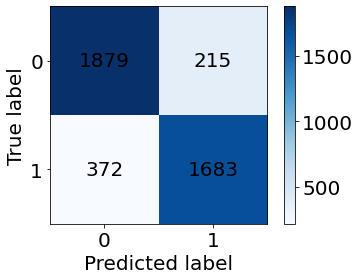

In [23]:
classes = list(set(y))
classes.sort()
confusion = confusion_matrix(y_predict_pca, y_test)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes, fontsize=20)
plt.yticks(indices, classes, fontsize=20)
plt.colorbar().ax.tick_params(labelsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.ylabel('True label', fontsize=20)
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index],
                 va='center', ha='center',fontsize=20, )

plt.show()

In [24]:
# K折交叉验证模块 
from sklearn.model_selection import cross_val_score 
#使用K折交叉验证模块  
#scores = cross_val_score(nvclassifier, X_test, y_test, cv=10, scoring='accuracy')  
scores = cross_val_score(PCA_SVM, X_test_pca, y_test, cv=10,scoring='accuracy')  

scores = np.around(scores,decimals=4)

#将10次的预测准确率打印出  
print('10折交叉验证准确率：',scores)  
# [0.92 1.   0.83 0.88 0.91 0.96 1.   1.   0.78 0.74]
#将10次的预测准确平均率打印出0.901630434782608  

scoresmean = np.around(scores.mean(),decimals=4)

print('\n\n10折交叉验证平均准确率：',scoresmean)

10折交叉验证准确率： [0.9976 0.9904 0.9952 0.9928 0.9952 0.9976 0.9952 0.9976 0.9952 0.9976]


10折交叉验证平均准确率： 0.9954


In [25]:
precision = cross_val_score(PCA_SVM, X_test_pca, y_test, cv=10,scoring='precision') 

precision = np.around(precision,decimals=4)

print('10折交叉验证精确率：',precision)

precisionmean = np.around(precision.mean(),decimals=4)

print('\n\n10折交叉验证平均精确率：',precisionmean)

10折交叉验证精确率： [1.     1.     0.9951 0.9951 1.     0.9952 0.9904 1.     0.9904 1.    ]


10折交叉验证平均精确率： 0.9966


In [26]:
recall = cross_val_score(PCA_SVM, X_test_pca, y_test, cv=10,scoring='recall') 

recall = np.around(recall,decimals=4)

print('10折交叉验证精确率：',recall)

recallmean = np.around(recall.mean(),decimals=4)

print('\n\n10折交叉验证平均召回率：',recallmean)

10折交叉验证精确率： [0.9951 0.9805 0.9951 0.9902 0.9903 1.     1.     0.9951 1.     0.9951]


10折交叉验证平均召回率： 0.9941


In [27]:
f1 = cross_val_score(PCA_SVM, X_test_pca, y_test, cv=10,scoring='f1') 

f1 = np.around(f1,decimals=4)

print('10折交叉验证f1值：',f1)

f1mean = np.around(f1.mean(),decimals=4)

print('\n\n10折交叉验证平均f1值：',f1mean)

10折交叉验证f1值： [0.9976 0.9901 0.9951 0.9927 0.9951 0.9976 0.9952 0.9976 0.9952 0.9976]


10折交叉验证平均f1值： 0.9954


In [28]:
roc_auc = cross_val_score(PCA_SVM,  X_test_pca, y_test, cv=10,scoring='roc_auc') 

roc_auc = np.around(roc_auc,decimals=4)

print('10折交叉验证roc_auc值：',roc_auc)

roc_auc = np.around(roc_auc.mean(),decimals=4)

print('\n\n10折交叉验证平均ROC_AUC值：',roc_auc.mean())

10折交叉验证roc_auc值： [0.9985 0.9984 0.9988 1.     0.9994 0.9999 0.9999 1.     0.9986 1.    ]


10折交叉验证平均ROC_AUC值： 0.9994


[0 1]


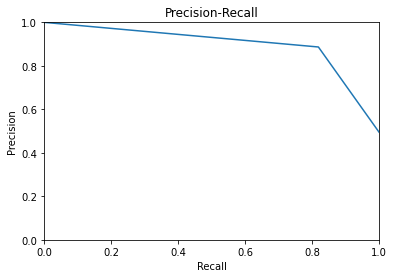

In [29]:
from sklearn.metrics import precision_recall_curve
precision, recall, t =precision_recall_curve(y_test, y_predict_pca) #y_score是预测的概率值，y_test是真实值标签值
print(t) #t是阈值
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.plot(recall, precision)
plt.title("Precision-Recall")
plt.show()